In [1]:
# !pip install -q seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
tf.__version__

'2.3.0'

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [5]:
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [6]:
dataset = raw_dataset.copy()
# dataset.tail()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
# dataset.get('Origin')

In [9]:
dataset = dataset.dropna()

In [10]:
dataset['Origin'] = dataset['Origin'].map({
    1:'USA',
    2:'Europe',
    3:'Japan'
})

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
pd.get_dummies?

In [12]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [13]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [14]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [15]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0


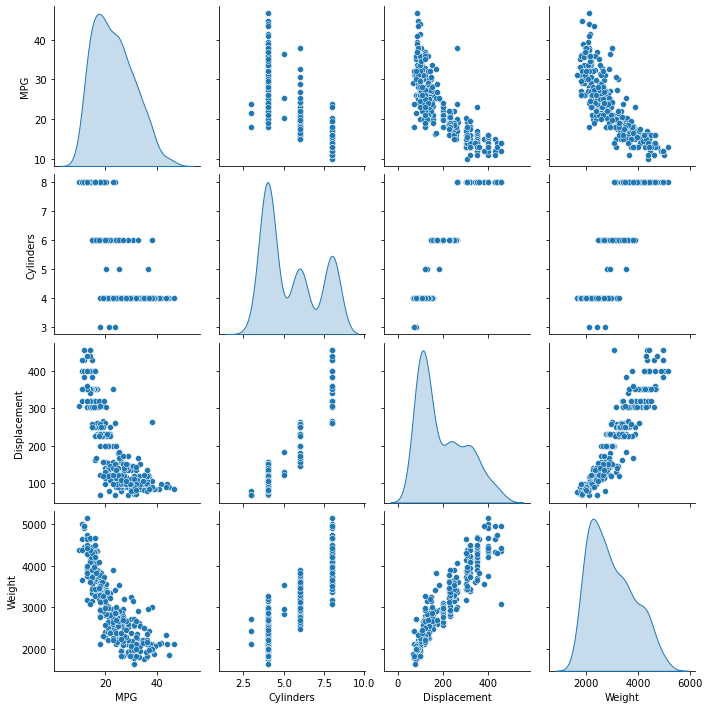

In [16]:
# sns.pairplot?
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [17]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [19]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [20]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [21]:
normalizer = preprocessing.Normalization()

In [22]:
normalizer.adapt(np.array(train_features))

In [23]:
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [25]:
train_features[:5]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0


In [26]:
first = np.array(train_features[:1])

In [27]:
# normalizer.adapt(first)

In [28]:
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [29]:
with np.printoptions(precision=2, suppress=True):
  print(first)
  print(normalizer(first).numpy())
  # print(normalizer(second).numpy())

[[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
[[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [30]:
second = np.array(train_features[:2])
zero = np.array(train_features[1:2])

In [31]:
second

array([[   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    0. ,    0. ,
           1. ],
       [   4. ,  140. ,   88. , 2890. ,   17.3,   79. ,    0. ,    0. ,
           1. ]])

In [32]:
zero

array([[   4. ,  140. ,   88. , 2890. ,   17.3,   79. ,    0. ,    0. ,
           1. ]])

In [33]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [34]:
first = np.array(train_features[:2])

with np.printoptions(precision=2, suppress=True):
  print('First example :', first)
  print()
  print('Normalized :', normalizer(first).numpy())

First example : [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]
 [   4.   140.    88.  2890.    17.3   79.     0.     0.     1. ]]

Normalized : [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]
 [-0.87 -0.53 -0.44 -0.12  0.63  0.85 -0.47 -0.5   0.78]]


In [35]:
# ini untuk menormalisasikan data horsepower
horsepower = np.array(train_features['Horsepower'])

horsepower_normalization = preprocessing.Normalization(input_shape=[1,])
horsepower_normalization.adapt(horsepower)

In [36]:
# create NN dengan output berupa 1 node
# (input ternormalisasi) -> (output)
horsepower_model = keras.Sequential([horsepower_normalization,
                                     keras.layers.Dense(units=1)])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [37]:
horsepower_model.predict(horsepower[:10])

array([[ 0.894],
       [ 0.505],
       [-1.649],
       [ 1.253],
       [ 1.133],
       [ 0.445],
       [ 1.342],
       [ 1.133],
       [ 0.295],
       [ 0.505]], dtype=float32)

In [38]:
type(horsepower_model)
keras.Sequential.predict?

In [39]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [40]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], 
    train_labels, 
    epochs=100,
    verbose=0, 
    validation_split=0.2
)

CPU times: user 3.09 s, sys: 252 ms, total: 3.34 s
Wall time: 3.13 s


In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804567,4.176684,95
96,3.804798,4.194248,96
97,3.804770,4.175458,97
98,3.806982,4.167539,98
99,3.804160,4.187780,99


In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

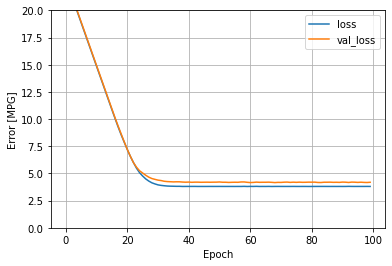

In [43]:
plot_loss(history)

In [44]:
test_result = {}

test_result['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [45]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [46]:
horsepower_model.predict?

In [47]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()


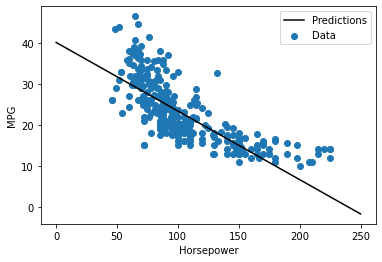

In [48]:
plot_horsepower(x, y)

In [49]:
linear_model = tf.keras.Sequential([
                                    normalizer,
                                    layers.Dense(units=1)
])

In [50]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.012],
       [ 0.605],
       [-0.741],
       [-0.114],
       [-0.332],
       [ 0.264],
       [-0.445],
       [ 0.618],
       [ 0.241]], dtype=float32)>

In [51]:
linear_model.predict(train_features[:10])

array([[ 0.175],
       [ 0.135],
       [-0.34 ],
       [ 1.048],
       [ 1.44 ],
       [ 0.512],
       [ 1.459],
       [-1.594],
       [ 0.028],
       [ 0.39 ]], dtype=float32)

In [52]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [53]:
%%time
new_history = linear_model.fit(
    train_features, train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 3.12 s, sys: 255 ms, total: 3.38 s
Wall time: 3.21 s


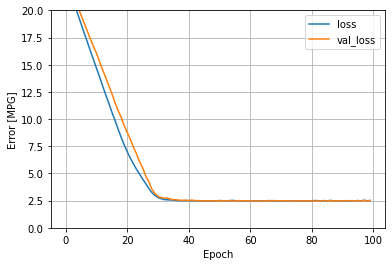

In [54]:
plot_loss(new_history)

In [55]:
test_result['linear_mode'] = linear_model.evaluate(
    test_features, test_labels, verbose=0
)

In [56]:
# bentuk layer : (input_norm) -> (64 hidden layer) -> (64 hidden layer) -> (single output)
def build_and_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(64, activation='relu'),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [57]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalization)

In [58]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [59]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 3.19 s, sys: 292 ms, total: 3.49 s
Wall time: 2.81 s


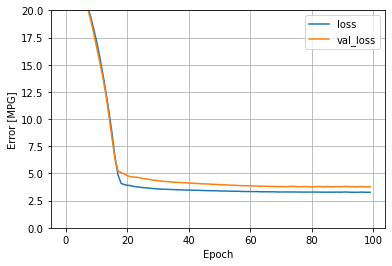

In [60]:
plot_loss(history)

In [61]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

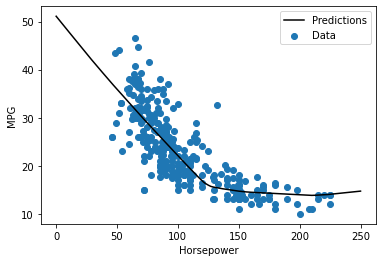

In [62]:
plot_horsepower(x, y)

In [63]:
test_result['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], 
    test_labels,
    verbose=0
)

In [64]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [65]:
%%time
history=dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2,
    epochs=1000
)

Epoch 1/1000
8/8 - 0s - loss: 23.0181 - val_loss: 23.1289
Epoch 2/1000
8/8 - 0s - loss: 22.4389 - val_loss: 22.4895
Epoch 3/1000
8/8 - 0s - loss: 21.8040 - val_loss: 21.7222
Epoch 4/1000
8/8 - 0s - loss: 21.0132 - val_loss: 20.7295
Epoch 5/1000
8/8 - 0s - loss: 19.9835 - val_loss: 19.4043
Epoch 6/1000
8/8 - 0s - loss: 18.6121 - val_loss: 17.6384
Epoch 7/1000
8/8 - 0s - loss: 16.8875 - val_loss: 15.5507
Epoch 8/1000
8/8 - 0s - loss: 14.9162 - val_loss: 13.5518
Epoch 9/1000
8/8 - 0s - loss: 12.9057 - val_loss: 11.4549
Epoch 10/1000
8/8 - 0s - loss: 10.6673 - val_loss: 9.4718
Epoch 11/1000
8/8 - 0s - loss: 8.4110 - val_loss: 7.6288
Epoch 12/1000
8/8 - 0s - loss: 6.9041 - val_loss: 6.9810
Epoch 13/1000
8/8 - 0s - loss: 6.2535 - val_loss: 6.3214
Epoch 14/1000
8/8 - 0s - loss: 5.4967 - val_loss: 5.6951
Epoch 15/1000
8/8 - 0s - loss: 4.8138 - val_loss: 5.1659
Epoch 16/1000
8/8 - 0s - loss: 4.3270 - val_loss: 4.7454
Epoch 17/1000
8/8 - 0s - loss: 3.8452 - val_loss: 4.2950
Epoch 18/1000
8/8 - 0

Epoch 144/1000
8/8 - 0s - loss: 1.5344 - val_loss: 2.1561
Epoch 145/1000
8/8 - 0s - loss: 1.5179 - val_loss: 2.2144
Epoch 146/1000
8/8 - 0s - loss: 1.4999 - val_loss: 2.2577
Epoch 147/1000
8/8 - 0s - loss: 1.5195 - val_loss: 2.2051
Epoch 148/1000
8/8 - 0s - loss: 1.5018 - val_loss: 2.2318
Epoch 149/1000
8/8 - 0s - loss: 1.4873 - val_loss: 2.2088
Epoch 150/1000
8/8 - 0s - loss: 1.5142 - val_loss: 2.2384
Epoch 151/1000
8/8 - 0s - loss: 1.4872 - val_loss: 2.2216
Epoch 152/1000
8/8 - 0s - loss: 1.5023 - val_loss: 2.2072
Epoch 153/1000
8/8 - 0s - loss: 1.5097 - val_loss: 2.2631
Epoch 154/1000
8/8 - 0s - loss: 1.5029 - val_loss: 2.1826
Epoch 155/1000
8/8 - 0s - loss: 1.5110 - val_loss: 2.2437
Epoch 156/1000
8/8 - 0s - loss: 1.5028 - val_loss: 2.1981
Epoch 157/1000
8/8 - 0s - loss: 1.4880 - val_loss: 2.2692
Epoch 158/1000
8/8 - 0s - loss: 1.4836 - val_loss: 2.1868
Epoch 159/1000
8/8 - 0s - loss: 1.4795 - val_loss: 2.2606
Epoch 160/1000
8/8 - 0s - loss: 1.4900 - val_loss: 2.2141
Epoch 161/1000

8/8 - 0s - loss: 1.3609 - val_loss: 2.2123
Epoch 286/1000
8/8 - 0s - loss: 1.3863 - val_loss: 2.2484
Epoch 287/1000
8/8 - 0s - loss: 1.3484 - val_loss: 2.2653
Epoch 288/1000
8/8 - 0s - loss: 1.3424 - val_loss: 2.2311
Epoch 289/1000
8/8 - 0s - loss: 1.3462 - val_loss: 2.2175
Epoch 290/1000
8/8 - 0s - loss: 1.3268 - val_loss: 2.2290
Epoch 291/1000
8/8 - 0s - loss: 1.3277 - val_loss: 2.2350
Epoch 292/1000
8/8 - 0s - loss: 1.3206 - val_loss: 2.2574
Epoch 293/1000
8/8 - 0s - loss: 1.3332 - val_loss: 2.2414
Epoch 294/1000
8/8 - 0s - loss: 1.3264 - val_loss: 2.2398
Epoch 295/1000
8/8 - 0s - loss: 1.3260 - val_loss: 2.2725
Epoch 296/1000
8/8 - 0s - loss: 1.3420 - val_loss: 2.2434
Epoch 297/1000
8/8 - 0s - loss: 1.3470 - val_loss: 2.2160
Epoch 298/1000
8/8 - 0s - loss: 1.3489 - val_loss: 2.2540
Epoch 299/1000
8/8 - 0s - loss: 1.3390 - val_loss: 2.2269
Epoch 300/1000
8/8 - 0s - loss: 1.3549 - val_loss: 2.3056
Epoch 301/1000
8/8 - 0s - loss: 1.3612 - val_loss: 2.2224
Epoch 302/1000
8/8 - 0s - los

Epoch 427/1000
8/8 - 0s - loss: 1.2575 - val_loss: 2.2890
Epoch 428/1000
8/8 - 0s - loss: 1.2355 - val_loss: 2.2671
Epoch 429/1000
8/8 - 0s - loss: 1.2371 - val_loss: 2.2898
Epoch 430/1000
8/8 - 0s - loss: 1.2474 - val_loss: 2.3140
Epoch 431/1000
8/8 - 0s - loss: 1.2436 - val_loss: 2.2719
Epoch 432/1000
8/8 - 0s - loss: 1.2405 - val_loss: 2.3196
Epoch 433/1000
8/8 - 0s - loss: 1.2820 - val_loss: 2.2796
Epoch 434/1000
8/8 - 0s - loss: 1.2641 - val_loss: 2.3006
Epoch 435/1000
8/8 - 0s - loss: 1.2341 - val_loss: 2.2541
Epoch 436/1000
8/8 - 0s - loss: 1.2649 - val_loss: 2.2864
Epoch 437/1000
8/8 - 0s - loss: 1.2323 - val_loss: 2.3003
Epoch 438/1000
8/8 - 0s - loss: 1.2581 - val_loss: 2.3230
Epoch 439/1000
8/8 - 0s - loss: 1.2293 - val_loss: 2.2826
Epoch 440/1000
8/8 - 0s - loss: 1.2637 - val_loss: 2.2829
Epoch 441/1000
8/8 - 0s - loss: 1.2723 - val_loss: 2.3053
Epoch 442/1000
8/8 - 0s - loss: 1.2550 - val_loss: 2.2626
Epoch 443/1000
8/8 - 0s - loss: 1.2578 - val_loss: 2.3055
Epoch 444/1000

8/8 - 0s - loss: 1.1973 - val_loss: 2.3234
Epoch 569/1000
8/8 - 0s - loss: 1.1967 - val_loss: 2.3092
Epoch 570/1000
8/8 - 0s - loss: 1.1940 - val_loss: 2.3199
Epoch 571/1000
8/8 - 0s - loss: 1.1769 - val_loss: 2.3162
Epoch 572/1000
8/8 - 0s - loss: 1.1852 - val_loss: 2.3127
Epoch 573/1000
8/8 - 0s - loss: 1.1840 - val_loss: 2.3350
Epoch 574/1000
8/8 - 0s - loss: 1.1900 - val_loss: 2.3239
Epoch 575/1000
8/8 - 0s - loss: 1.1918 - val_loss: 2.2956
Epoch 576/1000
8/8 - 0s - loss: 1.2306 - val_loss: 2.3305
Epoch 577/1000
8/8 - 0s - loss: 1.2974 - val_loss: 2.3464
Epoch 578/1000
8/8 - 0s - loss: 1.2503 - val_loss: 2.2873
Epoch 579/1000
8/8 - 0s - loss: 1.2416 - val_loss: 2.3199
Epoch 580/1000
8/8 - 0s - loss: 1.1941 - val_loss: 2.3299
Epoch 581/1000
8/8 - 0s - loss: 1.2245 - val_loss: 2.3017
Epoch 582/1000
8/8 - 0s - loss: 1.1860 - val_loss: 2.3407
Epoch 583/1000
8/8 - 0s - loss: 1.2033 - val_loss: 2.3431
Epoch 584/1000
8/8 - 0s - loss: 1.2038 - val_loss: 2.3252
Epoch 585/1000
8/8 - 0s - los

Epoch 710/1000
8/8 - 0s - loss: 1.1564 - val_loss: 2.2927
Epoch 711/1000
8/8 - 0s - loss: 1.1568 - val_loss: 2.2905
Epoch 712/1000
8/8 - 0s - loss: 1.1670 - val_loss: 2.3125
Epoch 713/1000
8/8 - 0s - loss: 1.1687 - val_loss: 2.3140
Epoch 714/1000
8/8 - 0s - loss: 1.1400 - val_loss: 2.2848
Epoch 715/1000
8/8 - 0s - loss: 1.1583 - val_loss: 2.3185
Epoch 716/1000
8/8 - 0s - loss: 1.1838 - val_loss: 2.2825
Epoch 717/1000
8/8 - 0s - loss: 1.1869 - val_loss: 2.3008
Epoch 718/1000
8/8 - 0s - loss: 1.1655 - val_loss: 2.2844
Epoch 719/1000
8/8 - 0s - loss: 1.1782 - val_loss: 2.3261
Epoch 720/1000
8/8 - 0s - loss: 1.1788 - val_loss: 2.3028
Epoch 721/1000
8/8 - 0s - loss: 1.1575 - val_loss: 2.3106
Epoch 722/1000
8/8 - 0s - loss: 1.1596 - val_loss: 2.2976
Epoch 723/1000
8/8 - 0s - loss: 1.1586 - val_loss: 2.3078
Epoch 724/1000
8/8 - 0s - loss: 1.1641 - val_loss: 2.3262
Epoch 725/1000
8/8 - 0s - loss: 1.1650 - val_loss: 2.2988
Epoch 726/1000
8/8 - 0s - loss: 1.1594 - val_loss: 2.2917
Epoch 727/1000

8/8 - 0s - loss: 1.1374 - val_loss: 2.2873
Epoch 852/1000
8/8 - 0s - loss: 1.1366 - val_loss: 2.3266
Epoch 853/1000
8/8 - 0s - loss: 1.1496 - val_loss: 2.2907
Epoch 854/1000
8/8 - 0s - loss: 1.1566 - val_loss: 2.3179
Epoch 855/1000
8/8 - 0s - loss: 1.1310 - val_loss: 2.3016
Epoch 856/1000
8/8 - 0s - loss: 1.1409 - val_loss: 2.3213
Epoch 857/1000
8/8 - 0s - loss: 1.1277 - val_loss: 2.3025
Epoch 858/1000
8/8 - 0s - loss: 1.1411 - val_loss: 2.2927
Epoch 859/1000
8/8 - 0s - loss: 1.1497 - val_loss: 2.2974
Epoch 860/1000
8/8 - 0s - loss: 1.1470 - val_loss: 2.3022
Epoch 861/1000
8/8 - 0s - loss: 1.1360 - val_loss: 2.2943
Epoch 862/1000
8/8 - 0s - loss: 1.1291 - val_loss: 2.3064
Epoch 863/1000
8/8 - 0s - loss: 1.1223 - val_loss: 2.2991
Epoch 864/1000
8/8 - 0s - loss: 1.1263 - val_loss: 2.2992
Epoch 865/1000
8/8 - 0s - loss: 1.1779 - val_loss: 2.2895
Epoch 866/1000
8/8 - 0s - loss: 1.1565 - val_loss: 2.2931
Epoch 867/1000
8/8 - 0s - loss: 1.1697 - val_loss: 2.2626
Epoch 868/1000
8/8 - 0s - los

Epoch 993/1000
8/8 - 0s - loss: 1.1096 - val_loss: 2.3032
Epoch 994/1000
8/8 - 0s - loss: 1.1192 - val_loss: 2.2875
Epoch 995/1000
8/8 - 0s - loss: 1.1257 - val_loss: 2.3300
Epoch 996/1000
8/8 - 0s - loss: 1.1272 - val_loss: 2.3095
Epoch 997/1000
8/8 - 0s - loss: 1.1071 - val_loss: 2.2985
Epoch 998/1000
8/8 - 0s - loss: 1.1114 - val_loss: 2.2865
Epoch 999/1000
8/8 - 0s - loss: 1.1175 - val_loss: 2.2972
Epoch 1000/1000
8/8 - 0s - loss: 1.1350 - val_loss: 2.3228
CPU times: user 44 s, sys: 4.25 s, total: 48.3 s
Wall time: 50.9 s


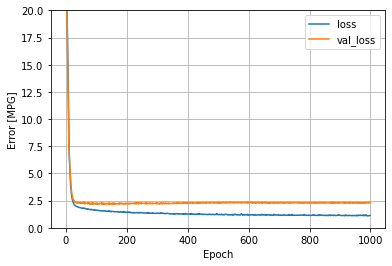

In [66]:
plot_loss(history)

In [67]:
test_result['dnn_model'] = dnn_model.evaluate(test_features,
                                               test_labels,
                                               verbose=0)

In [68]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.642530
linear_mode,2.529939
dnn_horsepower_model,2.948294
dnn_model,1.874352


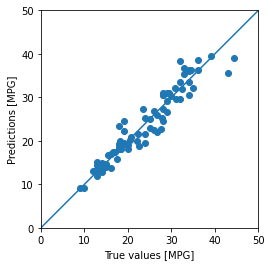

In [69]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

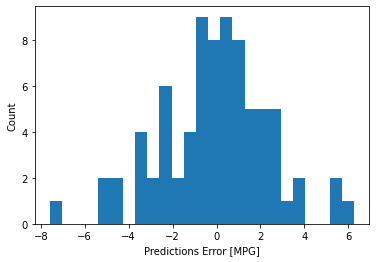

In [70]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Predictions Error [MPG]')
_ = plt.ylabel('Count')

In [71]:
dnn_model.save('dnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dnn_model/assets


In [72]:
reloaded = tf.keras.models.load_model('dnn_model')

test_result['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0
)

In [73]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.642530
linear_mode,2.529939
dnn_horsepower_model,2.948294
dnn_model,1.874352
reloaded,1.874352


In [74]:
normalizer.adapt?

In [75]:
print(help(tf.lite.TFLiteConverter))

Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |  
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |  
 |  Attributes:
 |    allow_custom_ops: Boolean indicating whether to allow custom operations.
 |      When False, any unknown operation is an error. When True, custom ops are
 |      created for any op that is unknown. The developer needs to provide these
 |      to the TensorFlow Lite runtime with a custom resolver. (default False)
 |    optimizations: Experimental flag, subject to change. A list of optimizations
 |      to apply when converting the model. E.g. `[Optimize.DEFAULT]`
 |    representative_dataset: A representative dataset that can be used to
 |      generate input and output samples for the model. The converter can use the
 |      dataset to evaluate different optimizations. Note that this is an optional
 |      attribute but it 

In [76]:
converter = tf.lite.TFLiteConverter.from_saved_model('dnn_model')
tflite_model = converter.convert()

In [77]:
with open('model_dnn_regression.tflite', 'wb') as f:
  f.write(tflite_model)

In [78]:
dnn_model.predict?

In [79]:
test_features[3:4]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
31,4,113.0,95.0,2228.0,14.0,71,0,1,0


In [80]:
hey = np.array(test_features[3:4])
hey

array([[   4.,  113.,   95., 2228.,   14.,   71.,    0.,    1.,    0.]])

In [81]:
heyhey = [[4., 113., 95., 2228., 14., 71., 0., 1., 0.]]
heyhey

[[4.0, 113.0, 95.0, 2228.0, 14.0, 71.0, 0.0, 1.0, 0.0]]

In [82]:
dnn_model.predict(np.array(heyhey))

array([[25.065]], dtype=float32)

In [83]:
np.array(test_labels[:10])

array([15., 10.,  9., 25., 19., 14., 14., 13., 18., 35.])

In [84]:
!ls

LICENSE                        nitip_eko_notes.md
README.md                      pre_processing.ipynb
SCRAPPINGDATA                  pre_processing.py
dnn_model                      read_merge_dropdup_data.py
features.csv                   read_n_parse_data.py
img_notes                      read_n_parse_data_ndfilter.py
merged_data - Sheet7.csv       tflearn_regression.ipynb
merged_data - data_choosen.csv transform_1.csv
merged_kota_drop_dupl.csv      transform_2.csv
model_dnn_regression.tflite
